In [3]:
# File Handling and Manipulation
import os
import shutil
from PIL import Image

# Data Processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# GeoSpatial Data Processing
import rasterio
from rasterio.enums import Resampling
from rasterio.plot import show

# Utilities
import random
from tqdm import tqdm
import textwrap

In [59]:
metadata_df_1percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\metadata_1_percent.csv')
metadata_df_10percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\metadata_10_percent.csv')
metadata_df_50percent = pd.read_csv(r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\metadata_50_percent.csv')
metadata_df_original = pd.read_parquet(r'C:\Users\isaac\Downloads\metadata.parquet')

dataset_dir = r'C:\Users\isaac\Desktop\BigEarthTests\Subsets\1%Copy'

In [ ]:
unique_labels = metadata_df_original['labels'].explode().unique()
exploded_df = metadata_df_original.explode('labels')

label_counts = exploded_df['labels'].value_counts()
label_df = label_counts.reset_index()
label_df.columns = ['Label', 'Number of Images']

# Display the table
display(label_df)

,Label,Number of Images
0,Arable land,188025
1,Mixed forest,165780
2,Coniferous forest,154941
3,"Transitional woodland, shrub",141150
4,Broad-leaved forest,135928
5,"Land principally occupied by agriculture, with...",122709
6,Complex cultivation patterns,99598
7,Pastures,95605
8,Urban fabric,63758
9,Inland waters,63212


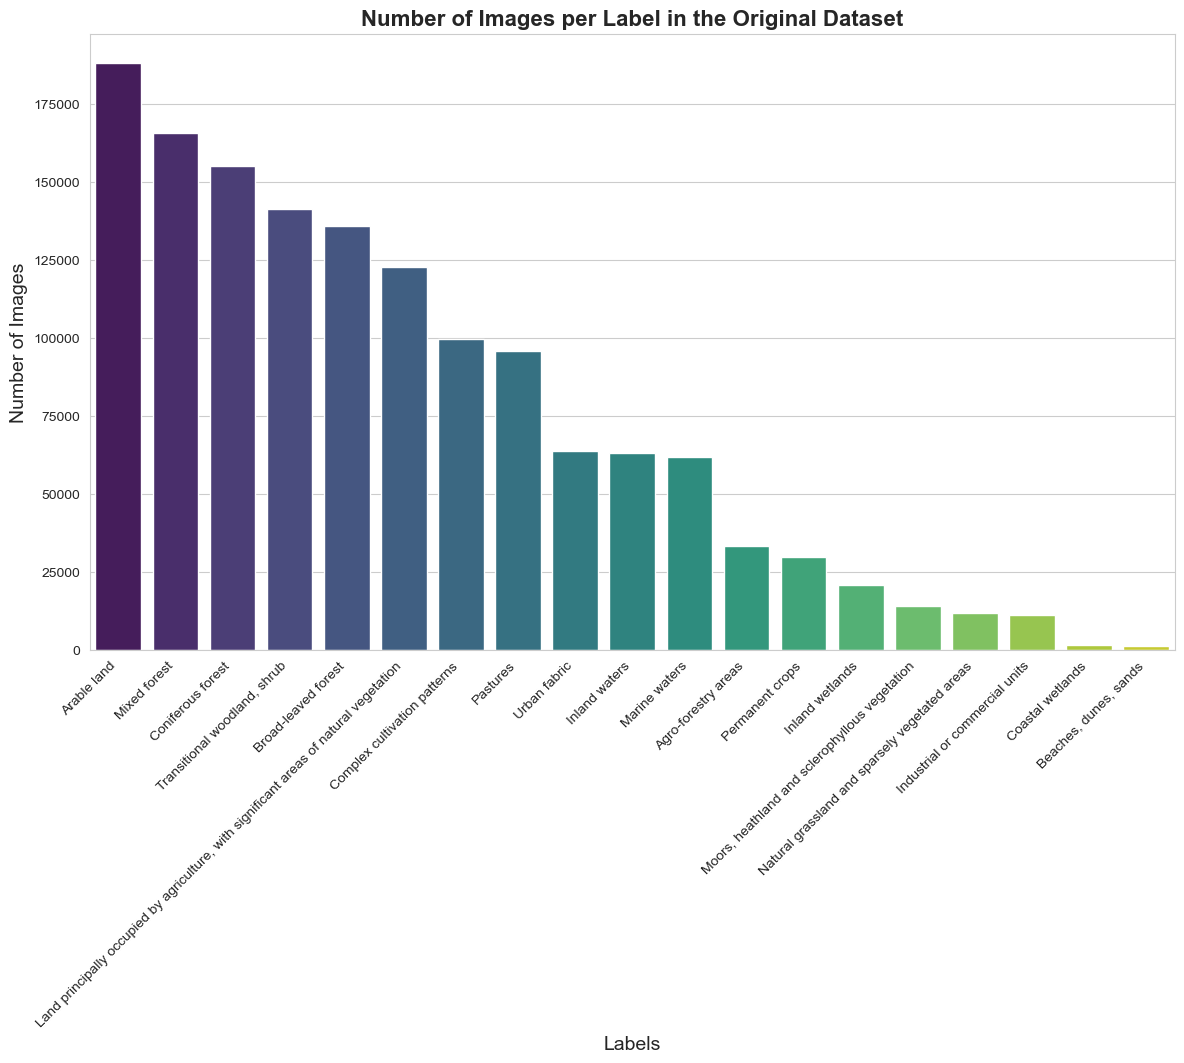

In [67]:
# Function to create a bar plot for the number of images per label
def create_label_bar_plot(metadata_df, title):
    # Explode the labels column
    exploded_df = metadata_df.explode('labels')
    
    # Count the number of images per label
    label_counts = exploded_df['labels'].value_counts()
    label_df = label_counts.reset_index()
    label_df.columns = ['Label', 'Number of Images']
    
    # Create the bar plot
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Label', y='Number of Images', data=label_df, hue='Label', palette='viridis', dodge=False, legend=False)
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel('Labels', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

create_label_bar_plot(metadata_df_original, 'Number of Images per Label in the Original Dataset')

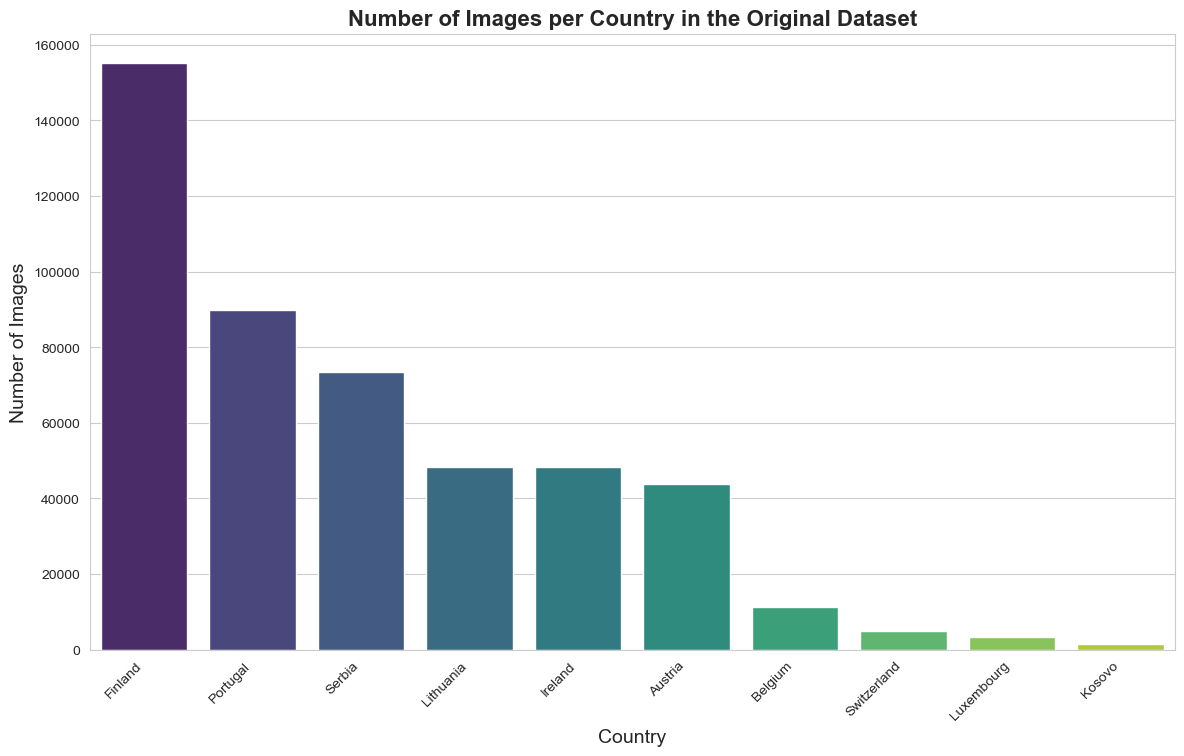

In [ ]:
def create_country_bar_plot(metadata_df, title):
    # Count the number of images per country
    country_counts = metadata_df['country'].value_counts()

    # Prepare data for bar graph
    country_df = country_counts.reset_index()
    country_df.columns = ['Country', 'Number of Images']
    sns.set_style("whitegrid")

    # Create the bar graph
    plt.figure(figsize=(14, 8))  

    # Plot the bar graph
    ax = sns.barplot(x='Country', y='Number of Images', data=country_df, hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Display the bar graph
    plt.show()

create_country_bar_plot(metadata_df_original, 'Number of Images per Country in the Original Dataset')

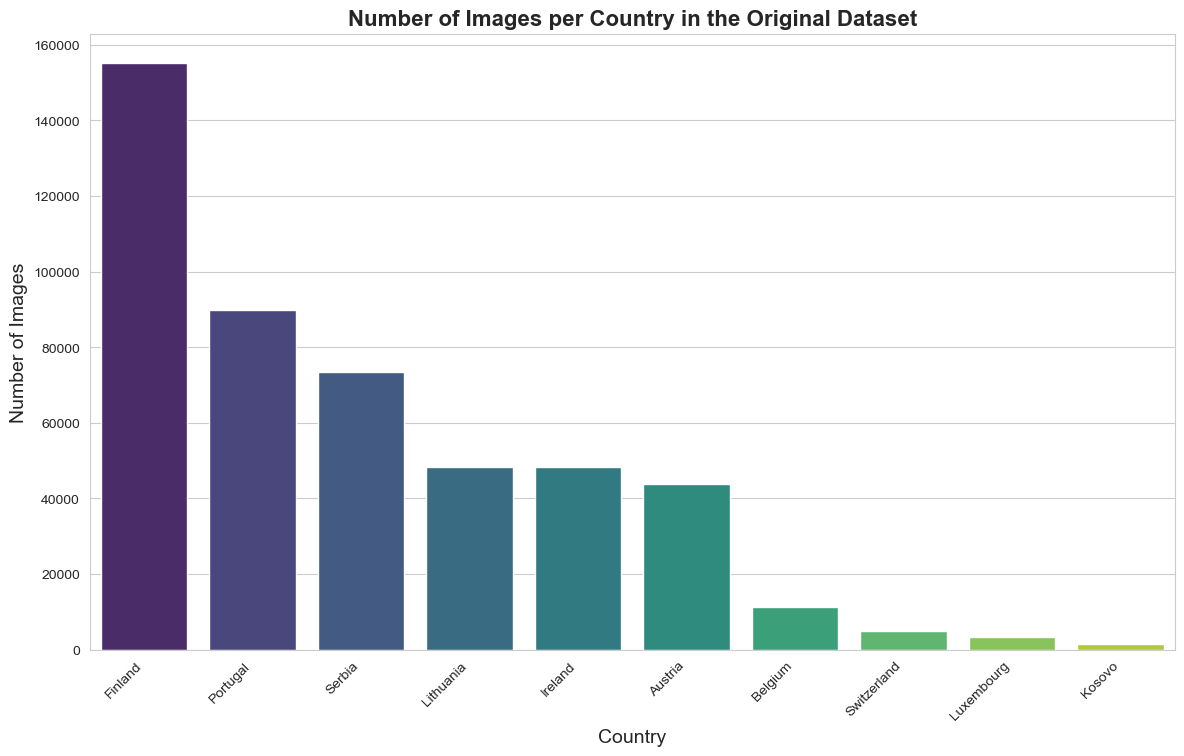

In [ ]:
def create_country_bar_plot(metadata_df, title):
    # Count the number of images per country
    country_counts = metadata_df['country'].value_counts()

    # Prepare data for bar graph
    country_df = country_counts.reset_index()
    country_df.columns = ['Country', 'Number of Images']
    sns.set_style("whitegrid")

    # Create the bar graph
    plt.figure(figsize=(14, 8))  

    # Plot the bar graph
    ax = sns.barplot(x='Country', y='Number of Images', data=country_df, hue='Country', palette='viridis', dodge=False, legend=False)
    plt.xlabel('Country', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')

    # Display the bar graph
    plt.show()

create_country_bar_plot(metadata_df_original, 'Number of Images per Country in the Original Dataset')

Total number of records: 480038


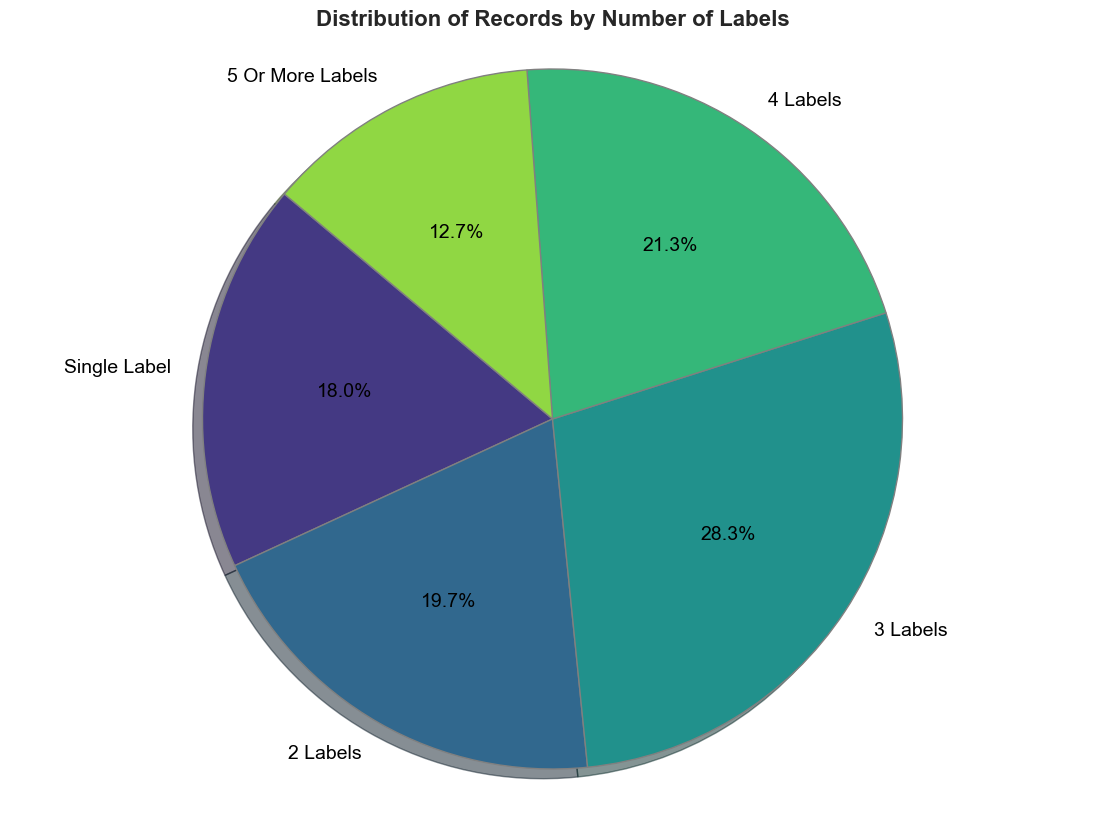

In [80]:
def plot_label_distribution(metadata_df):
    metadata_df['labels'] = metadata_df['labels'].apply(lambda x: x.tolist() if isinstance(x, np.ndarray) else x)
    # Count the number of labels per record
    metadata_df['label_count'] = metadata_df['labels'].apply(len)

    # Get the counts for each label count
    single_label_count = metadata_df[metadata_df['label_count'] == 1].shape[0]
    two_labels_count = metadata_df[metadata_df['label_count'] == 2].shape[0]
    three_labels_count = metadata_df[metadata_df['label_count'] == 3].shape[0]
    four_labels_count = metadata_df[metadata_df['label_count'] == 4].shape[0]
    five_labels_count = metadata_df[metadata_df['label_count'] >= 5].shape[0]


    # Calculate the total number of records
    total_records = (single_label_count + two_labels_count + three_labels_count +
                     four_labels_count + five_labels_count)
    print(f"Total number of records: {total_records}")
    sns.set_style("whitegrid")

    # Data for the pie chart
    sizes = [single_label_count, two_labels_count, three_labels_count, four_labels_count, five_labels_count]
    labels = ['Single Label', '2 Labels', '3 Labels', '4 Labels', '5 Or More Labels']
    colors = sns.color_palette('viridis', len(sizes))  # Adjust the number of colors as needed

    # Create the pie chart
    plt.figure(figsize=(14, 10))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140,
            shadow=True, textprops={'fontsize': 14, 'color': 'black'}, wedgeprops={'edgecolor': 'grey'})

    # Title of the pie chart
    plt.title('Distribution of Records by Number of Labels', fontsize=16, weight='bold')

    # Display the pie chart
    plt.axis('equal')  
    plt.show()

plot_label_distribution(metadata_df_original)